<a href="https://colab.research.google.com/github/codeskavy/Clover-Walmart/blob/main/Demand_Forecastingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing important libraries and dataset**

In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
train = pd.read_csv("/content/train_data.csv")
test =  pd.read_csv("/content/test_data.csv")

In [ ]:
train.head()


,product_id,dates,price,product_tag,sales,city,user_id
0,4486,01/03/2013,324.91,Electronics,62,New York,23161
1,6870,21/03/2013,230.79,Furniture,17,New York,91494
2,4345,28/11/2013,201.04,Toys,78,New York,72785
3,5261,31/08/2013,316.83,Toys,18,Chicago,49236
4,6052,07/01/2013,392.30,Toys,38,Phoenix,41406


In [ ]:
test.head()


,product_id,dates,price,product_tag,sales,city,user_id
0,1860,2013-12-25,111.03,Toys,44,Houston,19269
1,6734,2013-09-23,319.69,Electronics,80,Phoenix,12895
2,3433,2013-11-09,17.75,Furniture,62,Houston,14011
3,6311,2013-09-04,177.13,Furniture,96,Houston,29782
4,7396,2013-08-27,139.80,Furniture,94,New York,88863


In [ ]:
train.describe()


,product_id,price,sales,user_id
count,700.000000,700.000000,700.000000,700.000000
mean,5553.624286,249.657557,50.187143,55844.854286
std,2521.092713,143.487947,28.450657,26615.468653
min,1004.000000,10.090000,1.000000,10060.000000
25%,3413.000000,123.667500,24.750000,32958.250000
50%,5736.500000,245.820000,50.000000,56415.500000
75%,7769.250000,375.882500,75.250000,79163.500000
max,9996.000000,498.100000,99.000000,99941.000000


In [ ]:
test.describe()


,product_id,price,sales,user_id
count,300.000000,300.000000,300.000000,300.000000
mean,5689.063333,250.663467,51.970000,53700.696667
std,2564.123398,139.630435,28.869023,26075.299111
min,1055.000000,10.160000,1.000000,10495.000000
25%,3498.750000,122.822500,27.000000,29858.250000
50%,5794.000000,254.165000,54.500000,51658.500000
75%,7938.000000,363.855000,76.250000,76462.750000
max,9905.000000,499.860000,99.000000,99626.000000


# DEMAND ANALYSIS

In [ ]:
print('Min date from test set: %s' % train['dates'].min())
print('Max date from test set: %s' % train['dates'].max())
import datetime
lag_size = len(test['dates'].unique())
print('Forecast lag size: ', lag_size)

Min date from test set: 01/03/2013
Max date from test set: 31/12/2013
Forecast lag size:  205


In [ ]:
daily_sales = train.groupby('dates', as_index=False)['sales'].sum()
print(daily_sales)

          dates  sales
0    01/03/2013     77
1    01/05/2013     85
2    01/06/2013    179
3    01/08/2013     44
4    01/10/2013     69
..          ...    ...
311  31/03/2013    114
312  31/05/2013    120
313  31/08/2013     99
314  31/10/2013    164
315  31/12/2013    144

[316 rows x 2 columns]


In [ ]:
daily_sales=daily_sales.reset_index()['sales']
print(daily_sales)


0       77
1       85
2      179
3       44
4       69
      ... 
311    114
312    120
313     99
314    164
315    144
Name: sales, Length: 316, dtype: int64


# *Global* Sales Plot

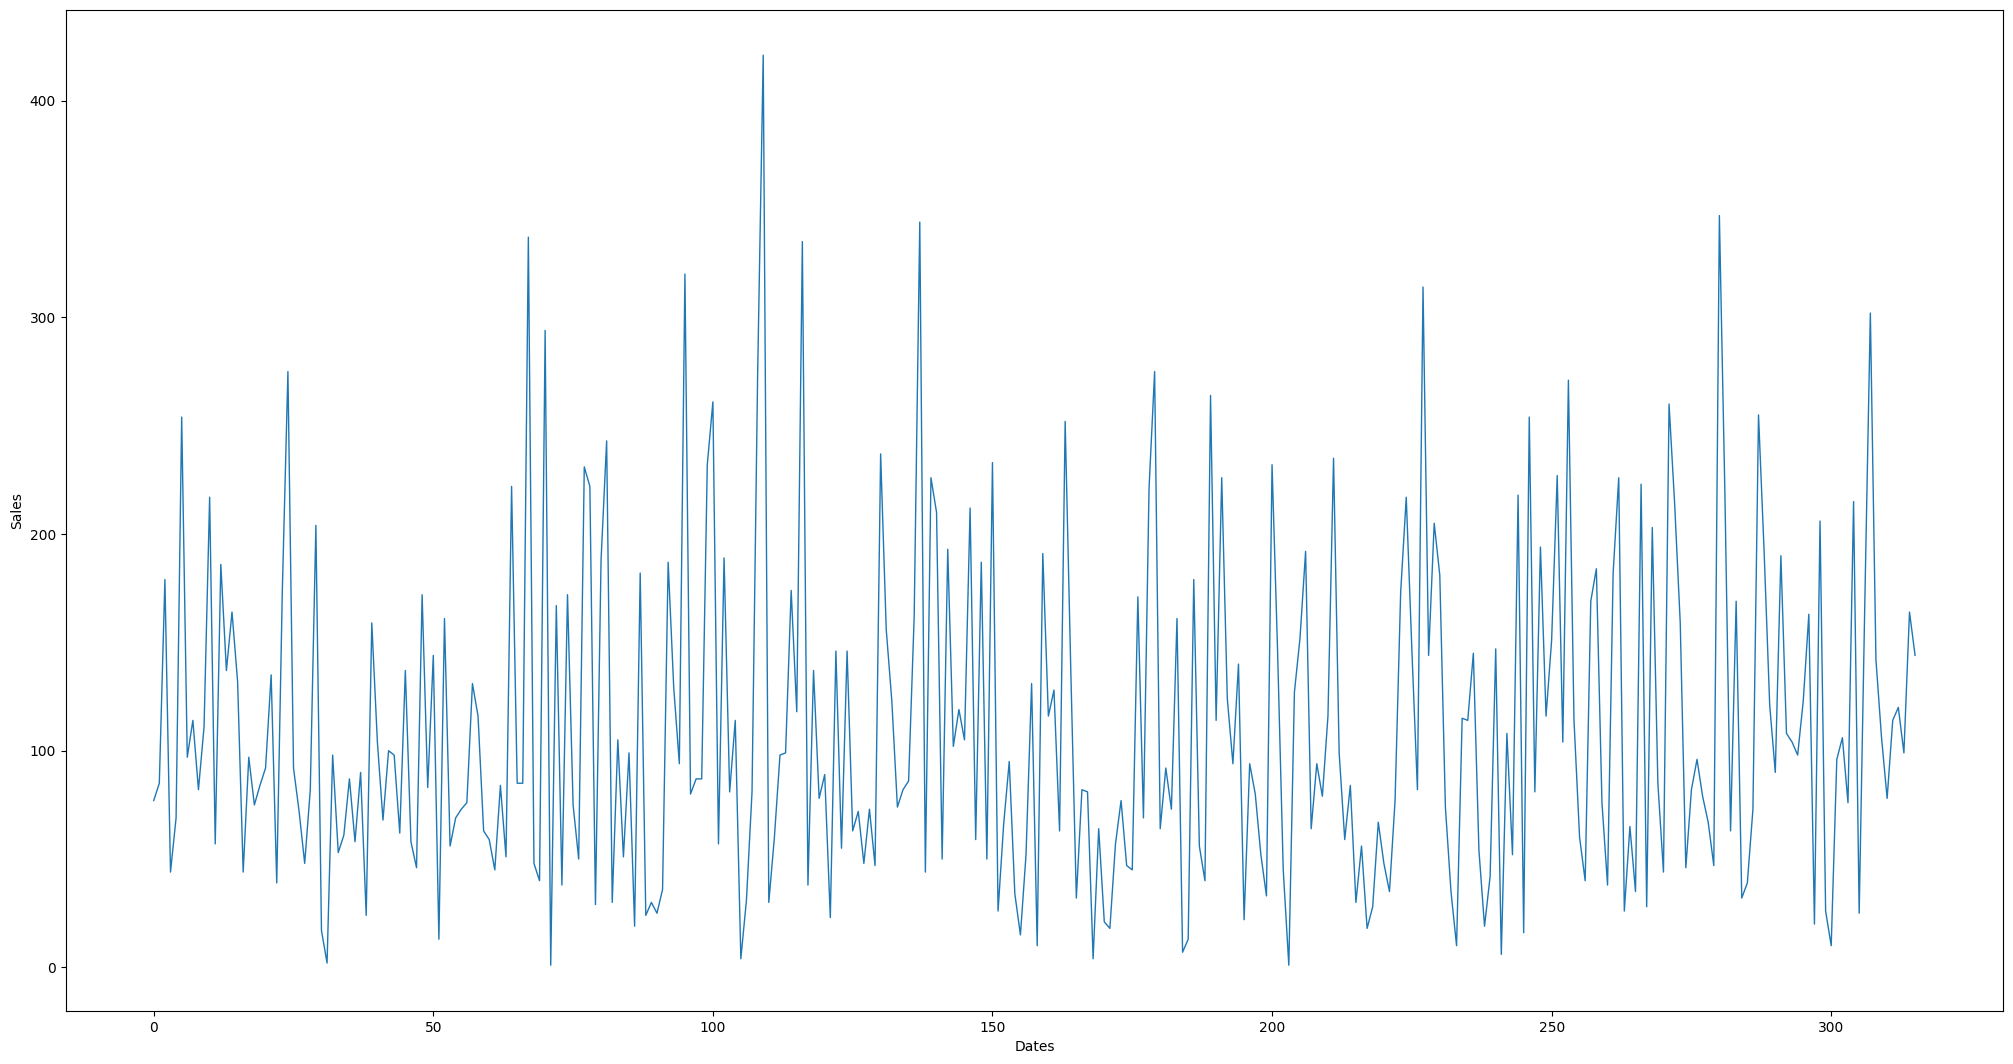

In [ ]:
plt.figure(figsize=(25,13))
plt.plot(daily_sales, linewidth=1)
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.show()

In [ ]:
plt.figure(figsize=(25,13))
legend = []
for i in range(10):
    store_sales=train.loc[train['store'] == i]
    store_sales=store_sales.groupby('date', as_index=False)['sales'].sum()
    store_sales=store_sales.reset_index()['sales']
    plt.plot(store_sales, linewidth=1)
    legend.append(('Store '+str(i+1)))
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend(legend, loc='upper left', ncol=1, fancybox=True, shadow=True)
plt.show()

KeyError: 'store'

<Figure size 2500x1300 with 0 Axes>

#**Product wise demand**

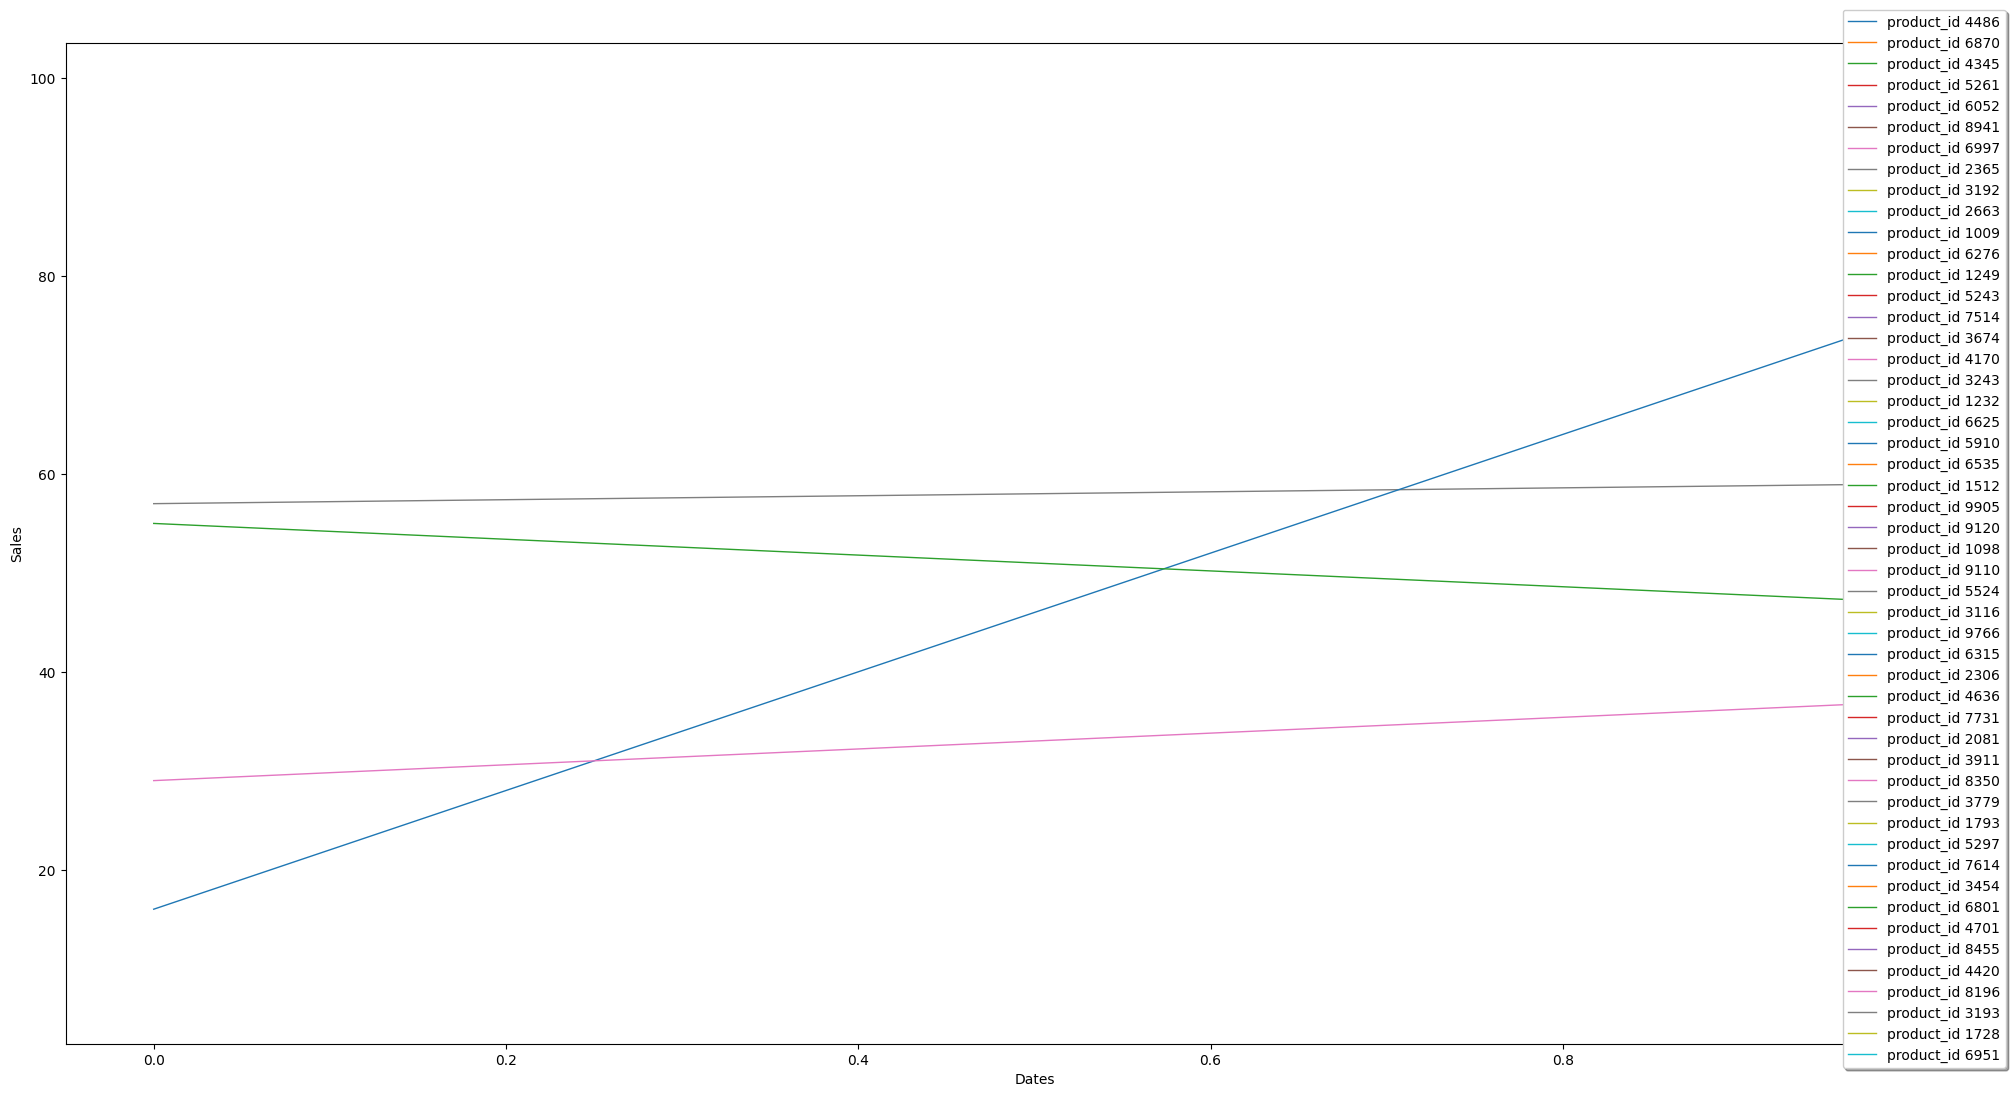

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('train_data.csv')

plt.figure(figsize=(25, 13))
legend = []

unique_product_ids = train['product_id'].unique()
if len(unique_product_ids) > 50:
    unique_product_ids = unique_product_ids[:50]

for product_id in unique_product_ids:
    item_sales = train.loc[train['product_id'] == product_id]
    item_sales = item_sales.groupby('dates', as_index=False)['sales'].sum()
    item_sales = item_sales.reset_index()['sales']
    plt.plot(item_sales, linewidth=1)
    legend.append(f'product_id {product_id}')

plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend(legend, loc='upper right', ncol=1, bbox_to_anchor=[1.005, 1.04], fancybox=True, shadow=True)
plt.show()


# festive adjustment

In [ ]:
import pandas as pd

df = pd.read_csv('train_data.csv')

df['dates'] = pd.to_datetime(df['dates'], format='%d/%m/%Y')

festival_dates = ["01/03/2013", "01/05/2013"]

festival_dates = [pd.to_datetime(date, format='%d/%m/%Y') for date in festival_dates]

def update_prices(df, festival_dates):
    updated_df = df.copy()

    print("Original DataFrame:")
    print(updated_df.head())

    updated_df['price'] = updated_df.apply(
        lambda row: row['price'] * 0.95 if row['dates'] in festival_dates else row['price'],
        axis=1
    )

    print("Updated DataFrame:")
    print(updated_df.head())

    return updated_df

updated_df = update_prices(df, festival_dates)

output_file = 'updated_train_data.csv'
updated_df.to_csv(output_file, index=False)

print(f"Updated dataset saved to '{output_file}'")


Original DataFrame:
   product_id      dates   price  product_tag  sales      city  user_id
0        4486 2013-03-01  324.91  Electronics     62  New York    23161
1        6870 2013-03-21  230.79    Furniture     17  New York    91494
2        4345 2013-11-28  201.04         Toys     78  New York    72785
3        5261 2013-08-31  316.83         Toys     18   Chicago    49236
4        6052 2013-01-07  392.30         Toys     38   Phoenix    41406
Updated DataFrame:
   product_id      dates     price  product_tag  sales      city  user_id
0        4486 2013-03-01  308.6645  Electronics     62  New York    23161
1        6870 2013-03-21  230.7900    Furniture     17  New York    91494
2        4345 2013-11-28  201.0400         Toys     78  New York    72785
3        5261 2013-08-31  316.8300         Toys     18   Chicago    49236
4        6052 2013-01-07  392.3000         Toys     38   Phoenix    41406
Updated dataset saved to 'updated_train_data.csv'


# **Monthly Demand Affect**

   product_id  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  \
0        2365  348  232  232  348  232  348  232  348    0    0    0    0   
1        2663   33   22   22   33   22   33   22   33    0    0    0    0   
2        3192  222  148  148  222  148  222  148  222    0    0    0    0   
3        4345  234  156  156  234  156  234  156  234    0    0    0    0   
4        4486  186  124  124  186  124  186  124  186    0    0    0    0   
5        5261   54   36   36   54   36   54   36   54    0    0    0    0   
6        6052  114   76   76  114   76  114   76  114    0    0    0    0   
7        6870   51   34   34   51   34   51   34   51    0    0    0    0   
8        6997  252  168  168  252  168  252  168  252    0    0    0    0   
9        8941  165  110  110  165  110  165  110  165    0    0    0    0   

   Predicted_Next_Month_Sales  Predicted_September_Sales  
0                   -3.291929                 250.849975  
1                   -3.291929     

<ipython-input-6-d5f75e0fe7d5>:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(['September'], [product_sales[-1]], marker='x', label='Predicted Sales', color='red')


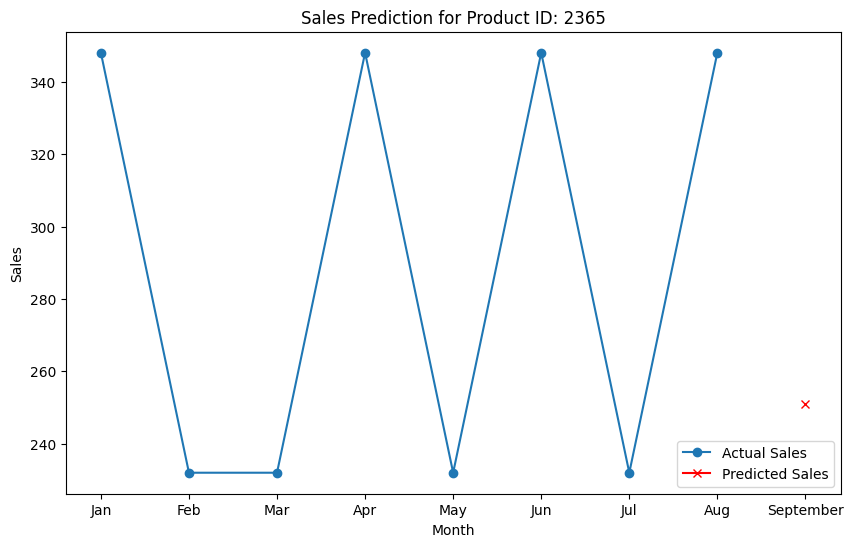

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
X = []
y = []

for index, row in monthly_sales.iterrows():
    for i in range(2, len(months)):
        X.append([row[months[i-2]], row[months[i-1]]])
        y.append(row[months[i]])

X = np.array(X)
y = np.array(y)


model = LinearRegression()
model.fit(X, y)

predictions = []
for index, row in monthly_sales.iterrows():
    july_august_sales = [row['Jul'], row['Aug']]  # Use sales of July and August
    predicted_september_sales = model.predict([july_august_sales])
    predictions.append(predicted_september_sales[0])

monthly_sales['Predicted_September_Sales'] = predictions

print(monthly_sales)

product_index = 0
product_sales = monthly_sales.loc[product_index, months + ['Predicted_September_Sales']]

plt.figure(figsize=(10, 6))
plt.plot(months, product_sales[:-1], marker='o', label='Actual Sales')
plt.plot(['September'], [product_sales[-1]], marker='x', label='Predicted Sales', color='red')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title(f'Sales Prediction for Product ID: {monthly_sales.loc[product_index, "product_id"]}')
plt.legend()
plt.show()

# FESTIVAL CHANGE PRICE MANIPULATION

  product_id product_name  price      tags  discounted_price
0         P1      Shampoo    100  Festival                80
1         P2        Cream    150    Normal               150
2         P3       Lotion    120  Festival                96
3         P4          Oil    130    Normal               130
4         P5         Soap     80  Festival                64


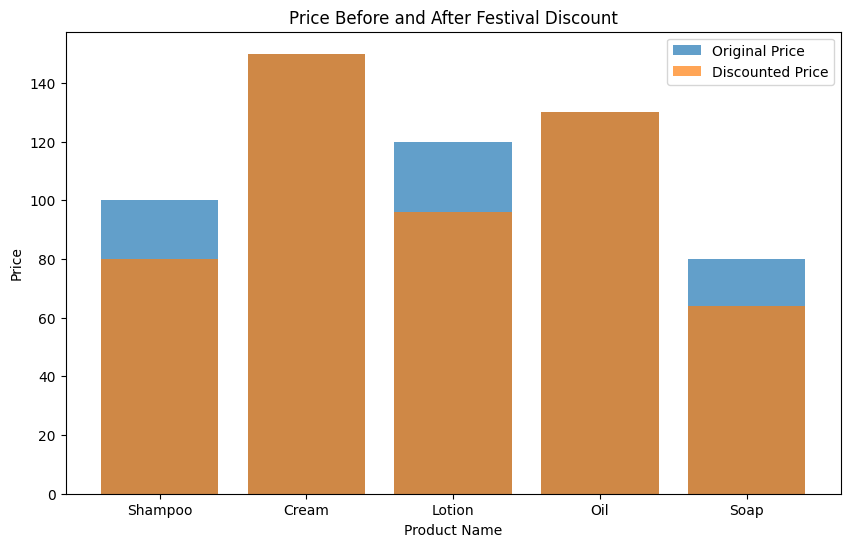

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'product_id': ['P1', 'P2', 'P3', 'P4', 'P5'],
    'product_name': ['Shampoo', 'Cream', 'Lotion', 'Oil', 'Soap'],
    'price': [100, 150, 120, 130, 80],
    'tags': ['Festival', 'Normal', 'Festival', 'Normal', 'Festival']  # Tags to identify festival products
}

df = pd.DataFrame(data)

def apply_festival_discount(df, tag, discount_percent):
    df['discounted_price'] = df['price']

    df.loc[df['tags'] == tag, 'discounted_price'] *= (1 - discount_percent / 100)

    return df

df = apply_festival_discount(df, tag='Festival', discount_percent=20)

print(df)

plt.figure(figsize=(10, 6))
plt.bar(df['product_name'], df['price'], label='Original Price', alpha=0.7)
plt.bar(df['product_name'], df['discounted_price'], label='Discounted Price', alpha=0.7)
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.title('Price Before and After Festival Discount')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/content/extended_train_data.csv')

df['dates'] = pd.to_datetime(df['dates'], format='%d/%m/%Y')



In [ ]:
import pandas as pd

data = {
    'product_id': [1, 2, 3, 4, 5],
    'product_tag': ['Festival', 'Regular', 'Festival', 'Festival', 'Regular'],
    'price': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)

def apply_festival_discount(df, tag, discount_percent):
    df['discounted_price'] = df['price'] * (1 - discount_percent / 100)

    df.loc[df['product_tag'] != tag, 'discounted_price'] = df['price']

    return df

try:
    discount_percent = float(input("Enter the discount percentage to apply for Festival products: "))
except ValueError:
    print("Invalid input. Please enter a valid number for the discount percentage.")
    discount_percent = 5

df = apply_festival_discount(df, tag='Festival', discount_percent=discount_percent)

print(df)



Enter the discount percentage to apply for Festival products: 5
   product_id product_tag  price  discounted_price
0           1    Festival    100              95.0
1           2     Regular    200             200.0
2           3    Festival    300             285.0
3           4    Festival    400             380.0
4           5     Regular    500             500.0


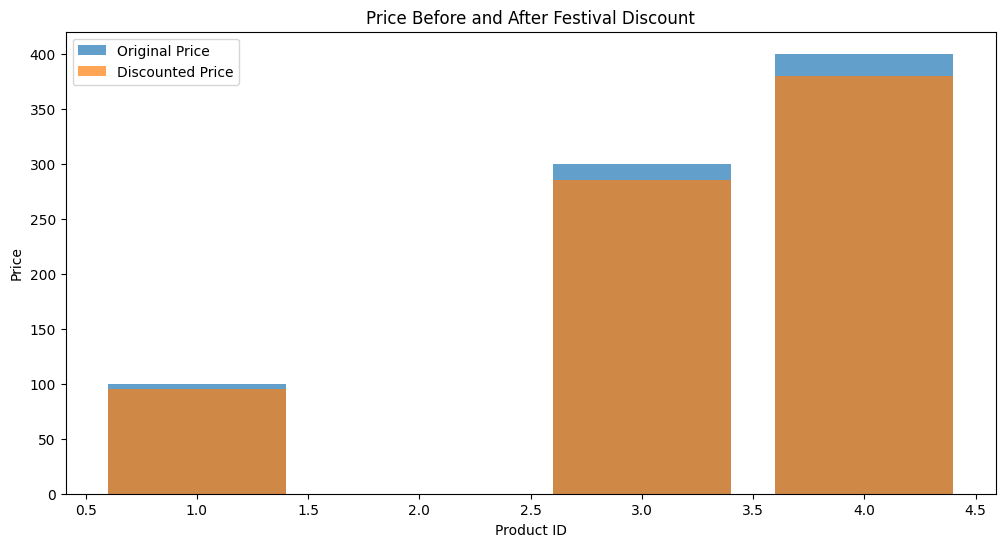

In [ ]:
import matplotlib.pyplot as plt

selected_products = df[df['product_tag'] == 'Festival'].head(10)  # Adjust the filter as needed

plt.figure(figsize=(12, 6))
plt.bar(selected_products['product_id'], selected_products['price'], label='Original Price', alpha=0.7)
plt.bar(selected_products['product_id'], selected_products['discounted_price'], label='Discounted Price', alpha=0.7)
plt.xlabel('Product ID')
plt.ylabel('Price')
plt.title('Price Before and After Festival Discount')
plt.legend()
plt.show()


In [ ]:
train.head()


In [ ]:
train = train[(train['date'] >= '2017-01-01')]
train_gp = train.sort_values('date').groupby(['item', 'store', 'date'], as_index=False)
train_gp = train_gp.agg({'sales':['mean']})
train_gp.columns = ['item', 'store', 'date', 'sales']
train_gp.head()


In [ ]:
train_gp


In [ ]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]

    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
window = 29
lag = lag_size
series = series_to_supervised(train_gp.drop('date', axis=1), window=window, lag=lag)
series.head()

In [ ]:
last_item = 'item(t-%d)' % window
last_store = 'store(t-%d)' % window
series = series[(series['store(t)'] == series[last_store])]
series = series[(series['item(t)'] == series[last_item])]


In [ ]:
columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['item', 'store']]
for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['item', 'store']]
series.drop(columns_to_drop, axis=1, inplace=True)
series.drop(['item(t)', 'store(t)'], axis=1, inplace=True)

In [ ]:
labels_col = 'sales(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)

X_train, X_valid, Y_train, Y_valid = train_test_split(series, labels.values, test_size=0.4, random_state=42)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
X_train.head()

In [ ]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer='adam')
model_lstm.summary()

In [ ]:
model_lstm.compile(optimizer='adam', loss='mse')


In [ ]:
lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=40, verbose=2)


In [ ]:
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], fancybox=True, shadow=True)
plt.show()

In [ ]:
predicted_sales = model_lstm.predict(X_valid_series)

Y_valid = Y_valid.flatten()
predicted_sales = predicted_sales.flatten()


In [ ]:
plt.plot(Y_valid, color='black', label=f"Actual Sales")
plt.plot(predicted_sales, color= 'green', label="Predicted Sales")
plt.title("Sales vs Predicted Sales")
plt.xlabel("Days in test period")
plt.ylabel("Price")
plt.legend(fancybox=True, shadow=True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')